<a href="https://colab.research.google.com/github/vhrique/anne_ptbr/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# _Perceptron_

O _Perceptron_ é uma representação matemática simplificada de neurônios, que foi publicada por Rosenblatt em 1958.
Este modelo aprende a realizar tarefas ao ajustar parâmetros internos de forma análoga a como conexões sinápticas são reforçadas por meio da aprendizagem Hebbiana, proposta em 1949.

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/perceptron.jpg?raw=true" width="500"></center>

No caso, as entradas do _perceptron_ fazem o papel dos dentritos, recebendo sinais que são então multiplicado por pesos, similar às forças de conexões sinápticas, e soma todos os valores.
Quando este valor passa de um determinado limiar, o perceptron irá ativar sua saída de forma análoga a como o neurônio irá disparar um impulso elétrico por seu axônio.

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/neuronio.jpg?raw=true" width="500"></center>

O _perceptron_ possui a forma matemática $\hat{y} = f(\mathbf{w}^T\mathbf{x} + b)$, onde $\mathbf{x}$ é um vetor de valores de entrada, que são multiplicados pelo vetor de pesos em $\mathbf{w}$ e somados com um valor de viés $b$, gerando um valor interno que é então passado à uma função de ativação $f(\cdot)$, que transforma no valor de saída $\hat{y}$.

# Código do _Perceptron_ em Python

Vejamos abaixo uma implementação do _perceptron_.

In [ ]:
import numpy as np

In [ ]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation_function(linear_output)

    def fit(self, X, y):
        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.predict(X[i])
                if y_pred != y[i]:
                    self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                    self.bias += self.learning_rate * (y[i] - y_pred)

O processo de aprendizagem do _perceptron_ para uma determinada tarefa ocorre por meio de um processo iterativo supervisionado.
A partir de valores iniciais aleatórios (ou não) em $\mathbf{w}$ e $b$, o _perceptron_:

1. Realiza a previsão a partir da entrada de exemplo.

2. Comparada a saída com o valor esperado de saída.

 $$e_i = y_i - \hat{y}_i$$

3. Ajusta seus $n$ pesos $\mathbf{w}$ e viés $b$ são ajustados proporcionalmente em função da taxa de aprendizado $\eta$, dos erros de previsão e sinal de entrada.

 $$w_n = w_n + η \cdot e_i \cdot x_n$$

 $$b = b + η \cdot e_i$$

Este processo se repete por todos os exemplos múltiplas vezes até que seja atingido um critério de parada, como um erro suficientemente baixo ou ao final de uma determinada quantidade de repetições (ou épocas).

# Exemplo de Aplicação - Problema Linear

Vamos analisar o aprendizado do _perceptron_ em um exemplo linear.

Definimos um problema linear como aquele que pode ser separado por meio de uma única reta (ou hyperplano, quando falamos de dimensões maiores).

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

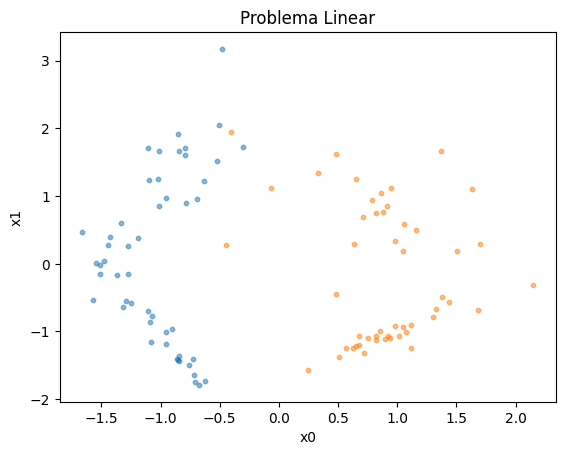

In [ ]:
X, y = make_classification(
    n_samples=100, n_features=2, n_classes=2,
    n_informative=2, n_redundant=0, n_repeated=0,
    random_state=1
)

plt.scatter(X[y==0,0], X[y==0,1], s=10, alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], s=10, alpha=0.5)
plt.title('Problema Linear')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

Criamos então o _perceptron_, cujo tamanho é definido como o número de variáveis do problema.

Em seguida, realizamos o treinamento por meio do método _fit_, que irá realizar o processo iterativo de ajuste dos pesos a partir do conjunto de dados.

Por fim, realizamos a previsão nos mesmos dados.

(Note que estamos utilizando os mesmos dados para treino e avaliação. O nome deste procedimento é resubstituição. Geralmente, preferimos avaliar o erro do modelo em um conjunto separado de dados, o que chamamos de validação cruzada.)

In [ ]:
model = Perceptron(input_size=X.shape[1])
model.fit(X, y)
y_pred = model.predict(X)

Vejamos então a saída do modelo.
Percebe-se que a borda de decisão é uma reta, conforme já mencionado.

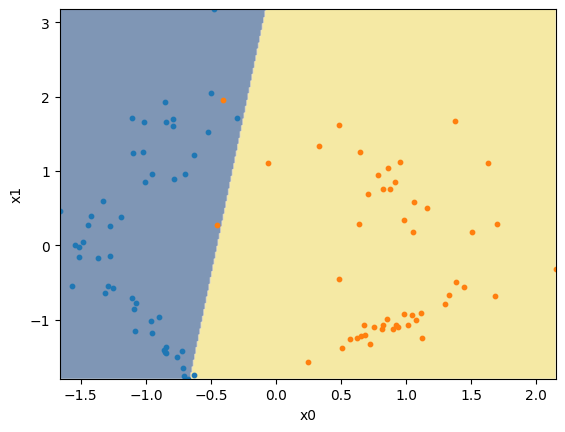

In [ ]:
def plot_decision_boundary(model, X, y, axis=None):
    xx, yy = np.meshgrid(np.arange(X[:,0].min(), X[:,0].max(), 0.01),
                         np.arange(X[:,1].min(), X[:,1].max(), 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    if axis is None:
        plt.contourf(xx, yy, Z, alpha=0.5, cmap='cividis', antialiased=True)
        plt.scatter(X[y==0,0], X[y==0,1], s=10)
        plt.scatter(X[y==1,0], X[y==1,1], s=10)
        plt.xlim(X[:,0].min(), X[:,0].max())
        plt.ylim(X[:,1].min(), X[:,1].max())
        plt.xlabel('x0')
        plt.ylabel('x1')
    else:
        axis.contourf(xx, yy, Z, alpha=0.5, cmap='cividis', antialiased=True)
        axis.scatter(X[y==0,0], X[y==0,1], s=10)
        axis.scatter(X[y==1,0], X[y==1,1], s=10)
        axis.set_xlim(X[:,0].min(), X[:,0].max())
        axis.set_ylim(X[:,1].min(), X[:,1].max())
        axis.set_xlabel('x0')
        axis.set_ylabel('x1')

plot_decision_boundary(model, X, y)
plt.show()

# Limitação do _Perceptron_ em Problemas Não-Lineares

Se aplicarmos o _perceptron_ em um problema não-linear, isto é, um problema cuja separação dos dados não segue uma linha reta, vemos que este modelo não consegue separar corretamente a maior parte dos exemplos.

In [ ]:
from sklearn.datasets import make_moons

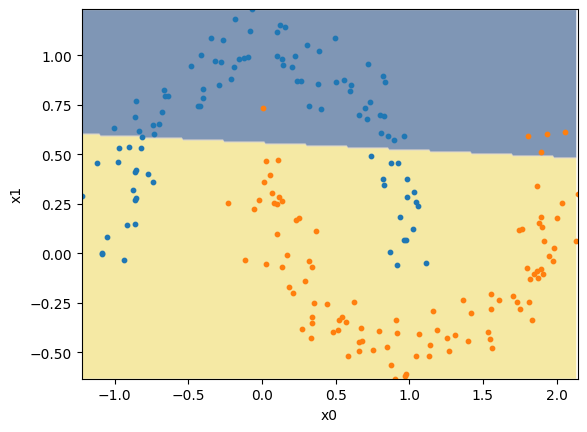

In [ ]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

model = Perceptron(input_size=X.shape[1])
model.fit(X, y)
y_pred = model.predict(X)

plot_decision_boundary(model, X, y)
plt.show()

Portanto, vemos uma importante limitação dos _perceptrons_.
Eles não conseguem resolver problemas não-lineares.
Para resolver isto, precisamos de modelos mais complexos.
Um exemplo é o _perceptron_ multicamadas, que veremos no próximo capítulo.

# Referências

- Rosenblatt, F. (1958). The perceptron: a probabilistic model for information storage and organization in the brain. Psychological review, 65(6), 386.
- Hebb, D. O. (1949). The organization of behavior: A neuropsychological theory. Psychology press.
